<a href="https://colab.research.google.com/github/nwenewo/My-projects/blob/main/June_Knowledge_showcase.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

In [ ]:
# Load the dataset
df = pd.read_excel('Student_math.xlsx')

In [ ]:
# Display the first few rows to understand the data structure
print("Fist 5 rows of the dataset:")
print(df.head())

Fist 5 rows of the dataset:
  school sex  age address famsize Pstatus  Medu  Fedu      Mjob   Fjob  ...  \
0     GP   M   16       U     LE3       T     4     3  services  other  ...   
1     GP   M   16       U     LE3       T     2     2     other  other  ...   
2     GP   M   15       U     LE3       A     3     2  services  other  ...   
3     GP   M   15       U     GT3       T     3     4     other  other  ...   
4     GP   M   15       U     GT3       T     4     3   teacher  other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      5        4      2     1     2      5       10  15  15  15  
1      4        4      4     1     1      3        0  12  12  11  
2      4        2      2     1     1      1        0  16  18  19  
3      5        5      1     1     1      5        0  14  15  15  
4      5        4      3     1     2      3        2  10  10  11  

[5 rows x 33 columns]


In [ ]:
# Check for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())


Missing values in each column:
school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64


In [ ]:
 # check data types and summary statistics
 print("\nData types and non-null counts:")
 print(df.info())
 print("\nSummary statistics of the dataset:")
 print(df.describe())


Data types and non-null counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 n

In [ ]:
# Focus on relevant columns: 'absences' and 'grades'
print("\nSummary statistics of 'absences' and 'grades' columns:")
print(df[['absences', 'G1', 'G2', 'G3']].describe())


Summary statistics of 'absences' and 'grades' columns:
         absences          G1          G2          G3
count  395.000000  395.000000  395.000000  395.000000
mean     5.708861   10.908861   10.713924   10.415190
std      8.003096    3.319195    3.761505    4.581443
min      0.000000    3.000000    0.000000    0.000000
25%      0.000000    8.000000    9.000000    8.000000
50%      4.000000   11.000000   11.000000   11.000000
75%      8.000000   13.000000   13.000000   14.000000
max     75.000000   19.000000   19.000000   20.000000


In [ ]:
# check for outliers in 'absences' column
print("\nQuantiles of 'absences' column:")
print(df['absences'].quantile([0.25, 0.5, 0.75, 0.99]))


Quantiles of 'absences' column:
0.25     0.00
0.50     4.00
0.75     8.00
0.99    38.12
Name: absences, dtype: float64


In [ ]:
# select the variables: 'absences' (independent) and 'G3' (dependent)
x = df[['absences']]
y = df['G3']

In [ ]:
# split the data into training and testing sets (80% train, 20% test)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
# combining the training data
df_test = x_test.copy()
df_test['G3'] = y_test
df_test.to_csv('test_dataset.csv')

In [ ]:
# verify the dataframe
print(df_test.head())

     absences  G3
78          1  12
371        13  13
248         0   9
55          6  10
390        11   9


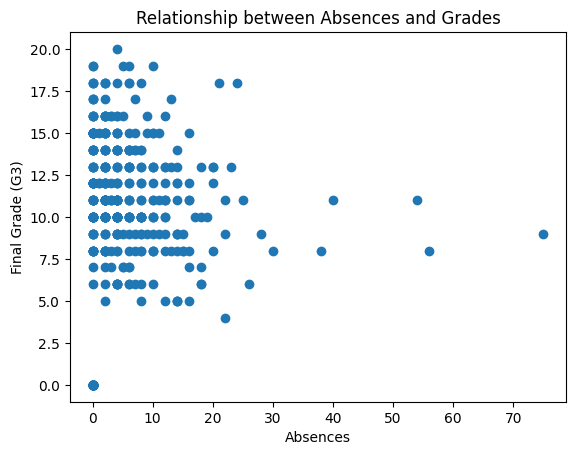

In [ ]:
# visualize the relationship between absences and grades
plt.scatter(x['absences'], y)
plt.xlabel('Absences')
plt.ylabel('Final Grade (G3)')
plt.title('Relationship between Absences and Grades')
plt.show()

In [ ]:
# Initialize and train the linear regression model
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [ ]:
# make prediction on the test set
y_pred = model.predict(x_test)

In [ ]:
# Evaluate the model using Mean squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 18.301301965492943


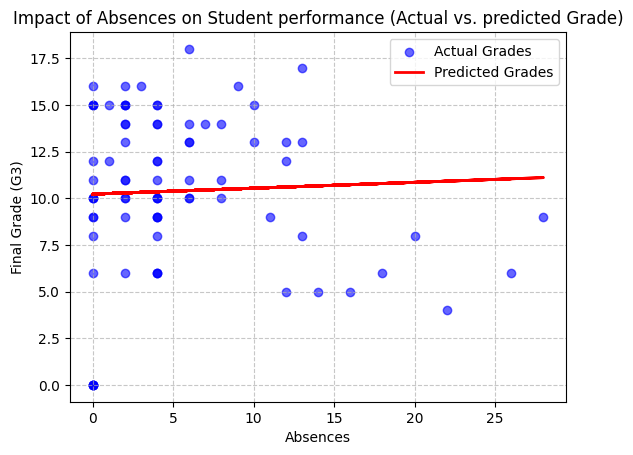

In [ ]:
# Visualize the result
plt.scatter(x_test['absences'], y_test, color='blue', label='Actual Grades', alpha=0.6)
plt.plot(x_test['absences'], y_pred, color='red',  linewidth=2, label='Predicted Grades')
plt.xlabel('Absences')
plt.ylabel('Final Grade (G3)')
plt.title('Impact of Absences on Student performance (Actual vs. predicted Grade)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.show()

In [ ]:
df.to_csv('test_data.csv')